# クラスター分析: アンケートデータ分析の2歩目
## 0. はじめに
### 0.1. ゴール
缶コーヒー市場の市場調査の一貫として、アンケートデータから顧客をクラスタリングして、顧客像をつかもう！
### 0.2. データ
8つのコーヒーの嗜好に関するアンケート項目(q，5段階評価)と3つのデモグラフィック項目Fで構成されています。

- q1 味や、品質にこだわる
- q2 ときと場合により、飲みわける
- q3 気に入ったブランドはない
- q4 人よりよく知っている
- q5 ひとより多く飲む
- q6 特に気にしない
- q7 新製品が出ると試してみる
- q8 好きなブランドを人に勧めることがある
- F1 年齢
 - 1: ~20
 - 2: 21~25
 - 3: 26~30
 - 4: 31~35
 - 5: 36~40
 - 6: 41~60
 - 7: 61~
- F2 性別
 - 1: 男性
 - 2: 女性
- F3 職業
 - 1: 自営業
 - 2: 会社員
 - 3: アルバイト
 - 4: 学生
 - 5: 専業主婦
 - 6: 無職
 - 7: その他

### 0.3. 分析の流れ
**1. データの前処理**
: 分析に入るまでの準備です


**2. 非階層クラスター分析**
: クラスタリングしていきます

**3. 結果の解釈**
: クラスターごとの特徴を可視化していきます

**4. 因子分析×クラスター分析**
: 因子でクラスタリングしてみます


## 1. データの前処理

In [66]:
import pandas as pd
df = pd.read_csv("COFFEE.csv")
df.head()

,ID,q1,q2,q3,q4,q5,q6,q7,q8,F1,F2,F3
0,1,4,4,2,3,2,2,4,4,6,2,5
1,2,5,3,5,3,1,5,1,1,2,1,4
2,3,5,1,1,5,4,1,5,5,5,1,2
3,4,4,4,3,2,3,3,3,2,2,2,3
4,5,4,4,5,2,2,2,2,2,4,2,3


In [67]:
# q1〜q8の項目でクラスタリングするので、データを分割する
df_cluster = df.iloc[:,1:9]
df_cluster.head()

,q1,q2,q3,q4,q5,q6,q7,q8
0,4,4,2,3,2,2,4,4
1,5,3,5,3,1,5,1,1
2,5,1,1,5,4,1,5,5
3,4,4,3,2,3,3,3,2
4,4,4,5,2,2,2,2,2


In [68]:
# df形式では分析出来ないので、行列形式に変換する。
df_cluster_ar = df_cluster.values
df_cluster_ar

array([[4, 4, 2, 3, 2, 2, 4, 4],
       [5, 3, 5, 3, 1, 5, 1, 1],
       [5, 1, 1, 5, 4, 1, 5, 5],
       [4, 4, 3, 2, 3, 3, 3, 2],
       [4, 4, 5, 2, 2, 2, 2, 2],
       [3, 3, 3, 1, 1, 1, 1, 1],
       [3, 3, 2, 2, 2, 3, 2, 2],
       [4, 3, 2, 2, 1, 2, 2, 2],
       [4, 4, 3, 2, 2, 4, 2, 1],
       [4, 4, 4, 2, 2, 2, 2, 4],
       [3, 3, 4, 2, 3, 3, 3, 1],
       [5, 5, 1, 4, 4, 3, 5, 4],
       [5, 4, 2, 3, 3, 2, 5, 5],
       [3, 2, 3, 2, 2, 3, 4, 1],
       [2, 3, 4, 2, 5, 4, 3, 2],
       [3, 2, 3, 1, 2, 4, 4, 2],
       [4, 1, 4, 3, 1, 4, 5, 2],
       [4, 1, 4, 3, 1, 3, 1, 2],
       [4, 2, 3, 2, 3, 3, 3, 3],
       [5, 4, 5, 3, 3, 1, 5, 4],
       [5, 4, 1, 4, 2, 1, 4, 3],
       [5, 3, 1, 2, 1, 1, 3, 3],
       [5, 4, 3, 1, 1, 4, 1, 1],
       [4, 2, 3, 2, 2, 4, 3, 2],
       [4, 5, 2, 2, 2, 3, 3, 2],
       [4, 2, 3, 2, 2, 3, 4, 2],
       [4, 4, 4, 3, 1, 3, 2, 2],
       [4, 4, 3, 2, 3, 2, 2, 1],
       [4, 3, 2, 3, 4, 2, 2, 2],
       [4, 2, 5, 2, 2, 5, 2, 1],
       [2,

## 2. 非階層クラスター分析

In [69]:
# クラスター分析
from sklearn.cluster import KMeans
# クラスターの数は4つにしてみます。
km = KMeans(n_clusters=4,random_state=42)

In [70]:
df_cluster_ar_pred = km.fit_predict(df_cluster_ar)
df_cluster_ar_pred

array([0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 2, 2, 2, 2, 3, 2, 0, 0, 0,
       1, 2, 1, 2, 1, 1, 2, 3, 3, 2, 3, 2, 1, 1, 1, 3, 3, 1, 0, 3, 2, 1,
       2, 0, 0, 3, 0, 2, 0, 2, 2, 1, 1, 0, 0, 1, 3, 1, 2, 1, 2, 1, 1, 2,
       0, 1, 3, 0, 2, 2, 1, 1, 3, 1, 1, 0, 3, 0], dtype=int32)

In [71]:
# クラスターの結果を元のデータに結合する
df['cluster_id'] = df_cluster_ar_pred
df.head()

,ID,q1,q2,q3,q4,q5,q6,q7,q8,F1,F2,F3,cluster_id
0,1,4,4,2,3,2,2,4,4,6,2,5,0
1,2,5,3,5,3,1,5,1,1,2,1,4,1
2,3,5,1,1,5,4,1,5,5,5,1,2,0
3,4,4,4,3,2,3,3,3,2,2,2,3,1
4,5,4,4,5,2,2,2,2,2,4,2,3,1


## 3. 結果の解釈
### 3.1. 人数

In [72]:
# クラスターの構成比をみてみます。
df['cluster_id'].value_counts()

1    30
2    20
0    18
3    12
Name: cluster_id, dtype: int64

### 3.2. 嗜好

In [73]:
df.groupby('cluster_id').mean()

,ID,q1,q2,q3,q4,q5,q6,q7,q8,F1,F2,F3
cluster_id,,,,,,,,,,,,
0,40.777778,4.777778,3.944444,1.944444,3.222222,2.555556,1.666667,4.222222,3.722222,2.777778,1.388889,3.555556
1,38.100000,3.766667,3.766667,3.500000,1.966667,1.800000,3.033333,2.233333,1.733333,2.700000,1.466667,3.400000
2,40.100000,3.700000,2.300000,3.100000,2.200000,2.750000,3.250000,3.800000,2.800000,3.250000,1.350000,3.700000
3,46.750000,2.583333,1.750000,4.166667,1.500000,1.333333,3.750000,1.833333,1.166667,2.500000,1.250000,3.333333


In [74]:
# 必要な項目だけに絞る
df_pre = pd.concat([df_cluster, df.cluster_id], axis = 1)
df_pre

,q1,q2,q3,q4,q5,q6,q7,q8,cluster_id
0,4,4,2,3,2,2,4,4,0
1,5,3,5,3,1,5,1,1,1
2,5,1,1,5,4,1,5,5,0
3,4,4,3,2,3,3,3,2,1
4,4,4,5,2,2,2,2,2,1
...,...,...,...,...,...,...,...,...,...
75,4,3,2,2,1,4,2,3,1
76,3,3,3,2,3,3,2,2,1
77,5,4,1,4,2,1,5,5,0
78,2,2,3,2,2,4,2,2,3


In [75]:
df_pre.groupby('cluster_id').mean()

,q1,q2,q3,q4,q5,q6,q7,q8
cluster_id,,,,,,,,
0,4.777778,3.944444,1.944444,3.222222,2.555556,1.666667,4.222222,3.722222
1,3.766667,3.766667,3.500000,1.966667,1.800000,3.033333,2.233333,1.733333
2,3.700000,2.300000,3.100000,2.200000,2.750000,3.250000,3.800000,2.800000
3,2.583333,1.750000,4.166667,1.500000,1.333333,3.750000,1.833333,1.166667


In [76]:
df_pre.groupby('cluster_id').mean().reset_index()

,cluster_id,q1,q2,q3,q4,q5,q6,q7,q8
0,0,4.777778,3.944444,1.944444,3.222222,2.555556,1.666667,4.222222,3.722222
1,1,3.766667,3.766667,3.500000,1.966667,1.800000,3.033333,2.233333,1.733333
2,2,3.700000,2.300000,3.100000,2.200000,2.750000,3.250000,3.800000,2.800000
3,3,2.583333,1.750000,4.166667,1.500000,1.333333,3.750000,1.833333,1.166667


In [77]:
# ヒートマップにして見やすくする。
import matplotlib.pyplot as plt
import seaborn as sns
cm = sns.light_palette("skyblue", as_cmap=True)

df_pre.groupby('cluster_id').mean().style.background_gradient(cmap=cm)

,q1,q2,q3,q4,q5,q6,q7,q8
cluster_id,,,,,,,,
0,4.777778,3.944444,1.944444,3.222222,2.555556,1.666667,4.222222,3.722222
1,3.766667,3.766667,3.500000,1.966667,1.800000,3.033333,2.233333,1.733333
2,3.700000,2.300000,3.100000,2.200000,2.750000,3.250000,3.800000,2.800000
3,2.583333,1.750000,4.166667,1.500000,1.333333,3.750000,1.833333,1.166667


### 3.3 デモグラフィック

In [78]:
df_demo = df.iloc[:, 9:13]
df_demo.head()

,F1,F2,F3,cluster_id
0,6,2,5,0
1,2,1,4,1
2,5,1,2,0
3,2,2,3,1
4,4,2,3,1


#### 3.3.1. 年齢

<AxesSubplot:xlabel='F1', ylabel='count'>

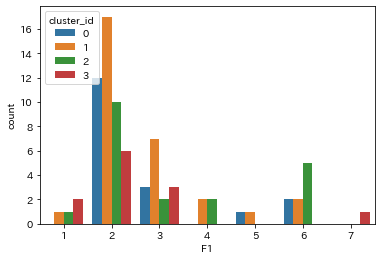

In [79]:
sns.countplot(data = df_demo, x = 'F1', hue = 'cluster_id')

In [107]:
# 正確な値が知りたい場合
df_demo.groupby(['cluster_id', 'F1']).size().reset_index()

,cluster_id,F1,0
0,0,2,12
1,0,3,3
2,0,5,1
3,0,6,2
4,1,1,1
5,1,2,17
6,1,3,7
7,1,4,2
8,1,5,1
9,1,6,2


#### 3.3.2. 性別

<AxesSubplot:xlabel='F2', ylabel='count'>

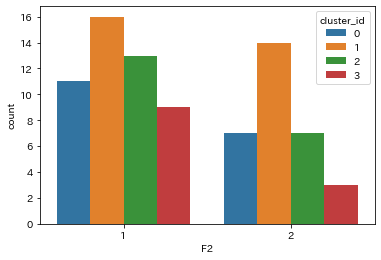

In [81]:
sns.countplot(data = df_demo, x = 'F2', hue = 'cluster_id')

#### 3.3.3. 人種

<AxesSubplot:xlabel='F3', ylabel='count'>

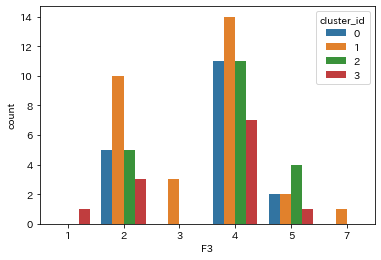

In [82]:
sns.countplot(data = df_demo, x = 'F3', hue = 'cluster_id')

## Groupwork: 20min
1. クラスターの個数を変えみよう
2. クラスターごとの特徴を分析結果から考察してみよう
3. クラスター分析が活用出来そうな状況を考えてみよう

## 4. 因子分析×クラスター分析

In [83]:
cor = df_cluster.corr()
cor

,q1,q2,q3,q4,q5,q6,q7,q8
q1,1.000000,0.400336,-0.301706,0.544620,0.121534,-0.282283,0.421438,0.513293
q2,0.400336,1.000000,-0.151067,0.224655,0.013877,-0.237834,0.175100,0.134631
q3,-0.301706,-0.151067,1.000000,-0.387715,-0.116653,0.384017,-0.317856,-0.426762
q4,0.544620,0.224655,-0.387715,1.000000,0.491741,-0.388207,0.469048,0.530094
q5,0.121534,0.013877,-0.116653,0.491741,1.000000,-0.210096,0.318093,0.326229
q6,-0.282283,-0.237834,0.384017,-0.388207,-0.210096,1.000000,-0.205128,-0.447006
q7,0.421438,0.175100,-0.317856,0.469048,0.318093,-0.205128,1.000000,0.627111
q8,0.513293,0.134631,-0.426762,0.530094,0.326229,-0.447006,0.627111,1.000000


In [84]:
# 必要なライブラリのインポート
import numpy as np
from numpy import linalg as LA
# 相関行列から固有値の算出
eigenv = LA.eigvals(cor)
eigenv

array([3.41851795, 1.1350158 , 0.26678993, 0.32952034, 0.90127797,
       0.81554794, 0.54940744, 0.58392262])

Text(0, 0.5, '固有値')

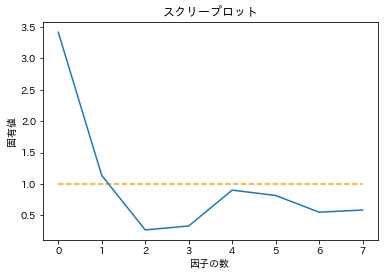

In [85]:
import matplotlib.pyplot as plt
import japanize_matplotlib
plt.plot(eigenv)
plt.hlines([1], 0, 7, 'orange', linestyles='dashed')
plt.title('スクリープロット')
plt.xlabel('因子の数')
plt.ylabel('固有値')

因子の数は2,3個が良さげですね。今回は2個でやってみます。

In [86]:
from sklearn.preprocessing import scale
df_scaled = scale(df_cluster)

In [98]:
from factor_analyzer import FactorAnalyzer
# 今回の因子分析の設定をする．まずはpromax回転で分析してみます．
fa_promax =FactorAnalyzer(n_factors=2, rotation='promax')
# データに対して因子分析を実行！
fa_promax.fit(df_scaled)
# 因子負荷量を出力
fa_promax.loadings_

array([[ 0.11404991,  0.70853409],
       [-0.16223965,  0.59217586],
       [-0.31714584, -0.25182166],
       [ 0.67832717,  0.15631595],
       [ 0.73717793, -0.32989188],
       [-0.32121645, -0.24641772],
       [ 0.5725058 ,  0.12730108],
       [ 0.67158001,  0.18417187]])

In [99]:
column = df_cluster.columns
result_promax = pd.DataFrame(fa_promax.loadings_, index = column, columns = ["Factor1","Factor2"])
result_promax.style.background_gradient(cmap=cm)

,Factor1,Factor2
q1,0.114050,0.708534
q2,-0.162240,0.592176
q3,-0.317146,-0.251822
q4,0.678327,0.156316
q5,0.737178,-0.329892
q6,-0.321216,-0.246418
q7,0.572506,0.127301
q8,0.671580,0.184172


**再掲**

- q1 味や、品質にこだわる
- q2 ときと場合により、飲みわける
- q3 気に入ったブランドはない
- q4 人よりよく知っている
- q5 ひとより多く飲む
- q6 特に気にしない
- q7 新製品が出ると試してみる
- q8 好きなブランドを人に勧めることがある

Factor1は市場への敏感さ因子、Factor2はこだわり因子？？

In [89]:
fa_varimax =FactorAnalyzer(n_factors=2, rotation='varimax')
fa_varimax.fit(df_scaled)
result_varimax = pd.DataFrame(fa_varimax.loadings_, index = column, columns = ["Factor1","Factor2"])
result_varimax.style.background_gradient(cmap=cm)

,Factor1,Factor2
q1,0.321842,0.711955
q2,0.024927,0.512747
q3,-0.376500,-0.341413
q4,0.689937,0.365753
q5,0.599011,-0.078996
q6,-0.378727,-0.337561
q7,0.580908,0.304281
q8,0.691947,0.390155


In [90]:
score_promax = fa_promax.transform(df_scaled)

In [91]:
df_promax = pd.DataFrame(score_promax, columns = ["Factor1", "Factor2"])
df_promax.head()

,Factor1,Factor2
0,0.993170,0.790536
1,-0.696545,0.188067
2,2.668083,1.173454
3,-0.061646,0.088466
4,-0.399893,0.063419


In [92]:
df = pd.concat([df, df_promax], axis = 1)
df.head()

,ID,q1,q2,q3,q4,q5,q6,q7,q8,F1,F2,F3,cluster_id,Factor1,Factor2
0,1,4,4,2,3,2,2,4,4,6,2,5,0,0.993170,0.790536
1,2,5,3,5,3,1,5,1,1,2,1,4,1,-0.696545,0.188067
2,3,5,1,1,5,4,1,5,5,5,1,2,0,2.668083,1.173454
3,4,4,4,3,2,3,3,3,2,2,2,3,1,-0.061646,0.088466
4,5,4,4,5,2,2,2,2,2,4,2,3,1,-0.399893,0.063419


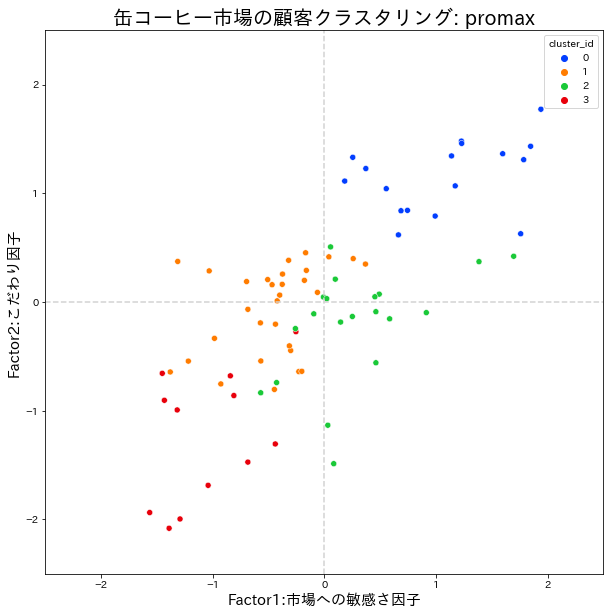

In [100]:
plt.figure(figsize=(10, 10))
sns.scatterplot(data = df, x = "Factor1", y = "Factor2", hue = "cluster_id", palette='bright')
plt.xlabel('Factor1:市場への敏感さ因子',size = 15)
plt.ylabel('Factor2:こだわり因子',size = 15)
plt.title('缶コーヒー市場の顧客クラスタリング: promax',size = 20)
plt.xlim(-2.5, 2.5)
plt.ylim(-2.5, 2.5)
plt.hlines([0], -2.5, 2.5, 'lightgray', linestyles='dashed')
plt.vlines([0], -2.5, 2.5, 'lightgray', linestyles='dashed')